# <center> Fourier Series and Transforms Jupyter Notebook<br>
#### By [Math and Physics Fun With Gus](https://mathphysicsfunwithgus.square.site)
__Sections__: <br>
[`Basic Fourier Series`](#BFS)<br>
[`Complex Representation of Fourier Series`](#CFS)<br>
[`Fourier Representation of Different Interval`](#FourierDiff_interval)<br>
[`Fourier Transforms`](#FourierTransforms)<br>
    
***

 > What is a Fourier seresis? In short, it is a method of representing periodic functions as a sum of sins and cosines.
    
## __Fourier Function Representation:__ <a id="BFS"></a>
    
\begin{align}
f(x) =& \frac{a_0}{2} + a_1\cos(x) + a_2\cos(2x) \ + \ ... \  + \ b_1\sin(x) + b_2\sin(2x) + \  ... \\
    =&\frac{a_0}{2}+ \sum_{n=1}^\infty \left( a_n \cos(nx) + b_n\sin(nx)\right)
\end{align}

***

### __Fourier Coefficients:__
\begin{align}
a_0 &= \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)dx \nonumber\\ \nonumber\\
a_n =& \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\cos\left(nx\right)dx\\ \nonumber \\
b_n =& \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)\sin\left(nx\right)dx \nonumber
\end{align}
    
***

In [3]:
import matplotlib.pyplot as pl
import numpy as np
from sympy import *
init_printing()

%config InlineBackend.figure_format = 'retina'
pl.rcParams.update({'font.size': 14}) 
pl.rcParams['figure.figsize'] = (13, 8)
init_printing()

# Must have https://www.latex-project.org installed.
pl.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

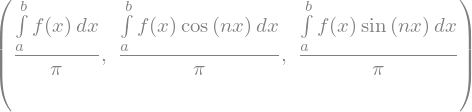

In [4]:
n = var('n', integer=True)
x, a, b = symbols('x, a, b')
f = Function('f')(x)
π = pi
    
"""
Bounds of integral is left as variables in case part of the function changes
or is zero, for which there would be no need to integrate over that part of the 
function. Also note that a_0 is covered in a_n, when n=0.
"""
a_0 = Integral( f , (x, a, b) ) / π
a_n = Integral( f * cos(n*x), (x, a, b) ) / π
b_n = Integral( f * sin(n*x), (x, a, b) ) / π

display(( a_0, a_n, b_n  ))

***
$\textbf{Example 1}$ Expand in a Fourier series the function
$$f(x) = 
\begin{cases}
0, & -\pi < x < 0\\
1, & 0 < x < \pi
\end{cases}
$$
***

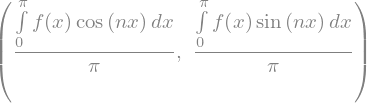

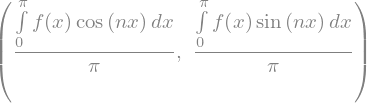

In [21]:
"""
Here .subs([]) replaces the variables to values. The .doit() evaluates the integral 
and .simplify() simplfies the expression. The function is 0 except for 0 < x < π thus
we only have to integrate over that domain.
"""
display(( a_n.subs( [(f, 1), (a, 0), (b, π)] ),
          b_n.subs( [(f, 1), (a, 0), (b, π)] )  ))

# The function is odd so a_n=0 except for a_0=1
display(( a_n.subs(  [(f, 1), (a, 0), (b, π)] ).doit().simplify(), 
          b_n.subs(  [(f, 1), (a, 0), (b, π)] ).doit().simplify()  ))
# so for even we get that b_n=0 and odd b_n=2/(nπ)

In [22]:
n = np.arange(1, 1000, 2)               # sin(nx) where n is odd, this increase by 2
x = np.arange( - np.pi, np.pi, 0.01 )

y = np.zeros( (len(x), len(n)) )
f = np.zeros( len(x) )

# composes each function decomposed for various values of x
for i in range( len(n) ):
             
    for j in range( len(x) ):
        
        y[j, i] = 2 * ( np.sin(n[i] * x[j]) / n[i] ) / np.pi
        
# sums the functions creating the Fourier Series
for i in range( len(x) ):
    
    f[i] = 1 / 2 + np.sum( y[i, :] )  # 1/2 comes from a_0

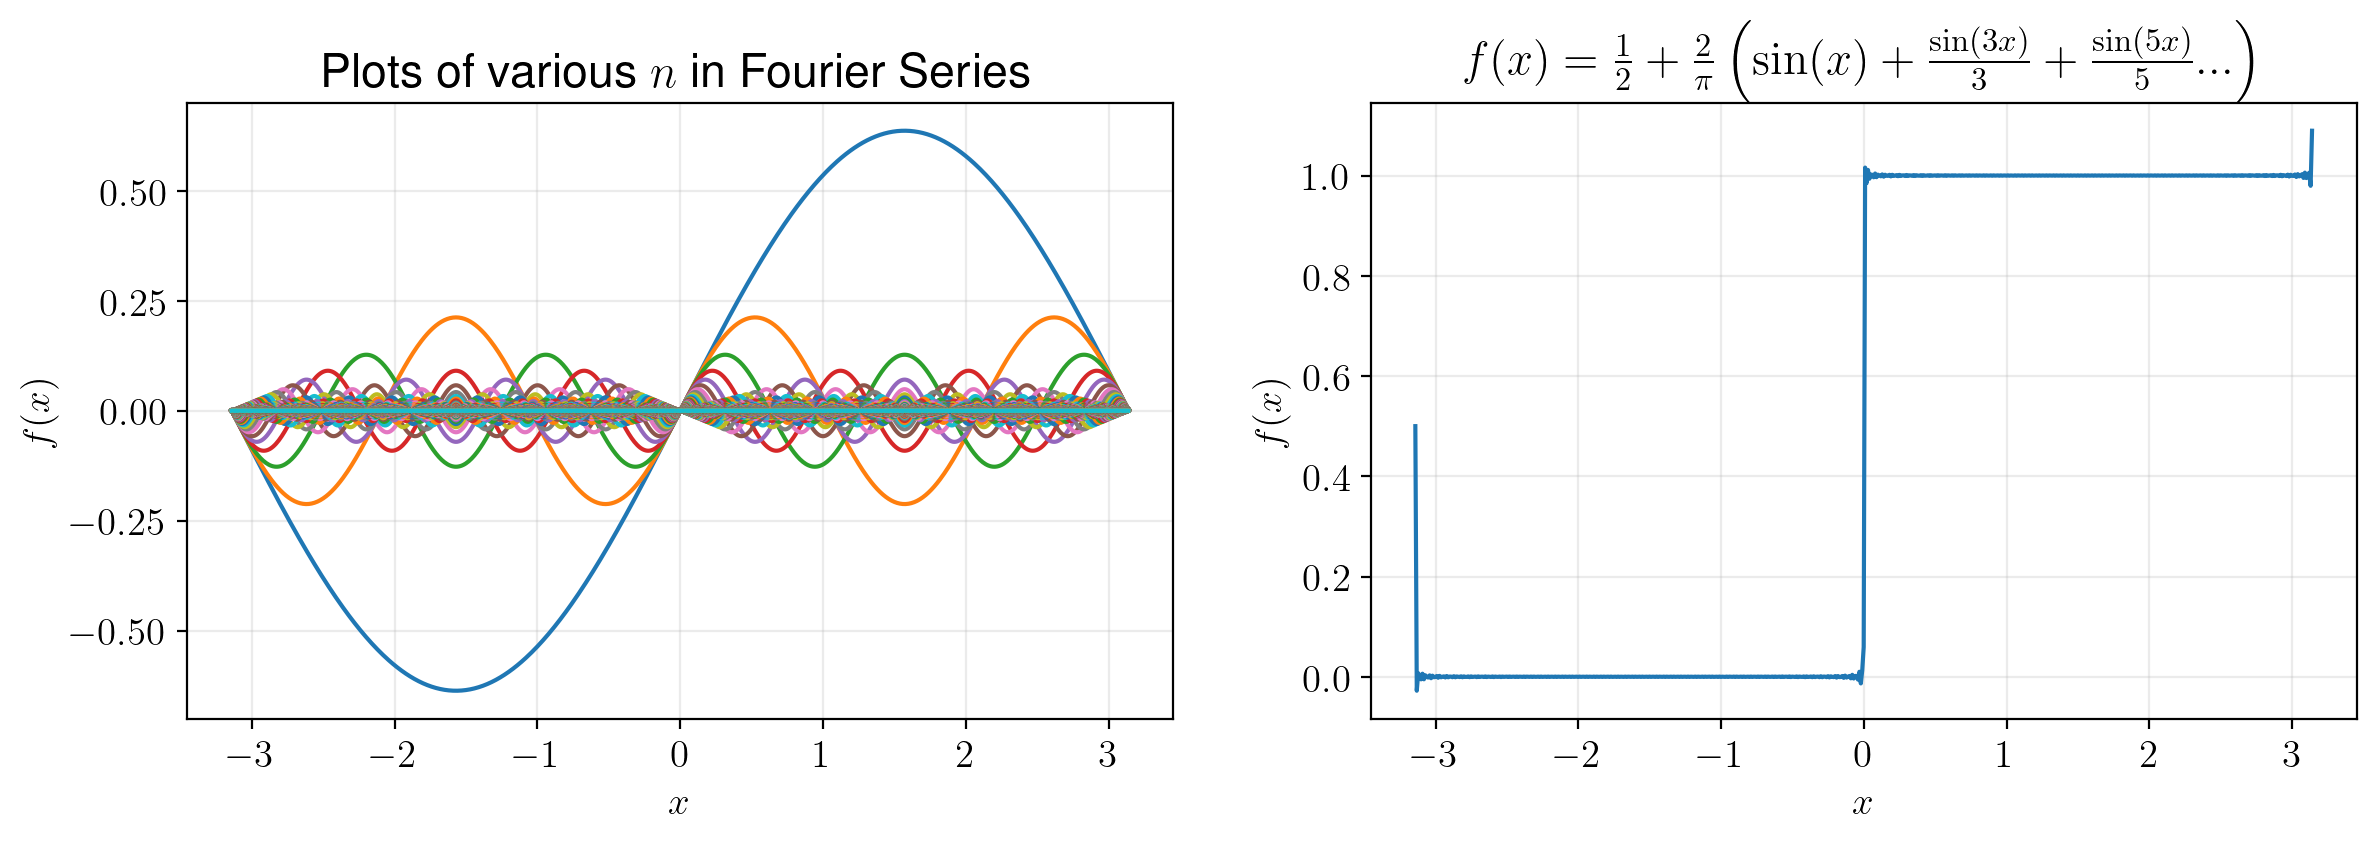

In [31]:
fig, ax = pl.subplots(1, 2, figsize=(14,4))

# plotting
ax[0].plot(x, y)
ax[0].set_title(r'Plots of various $n$ in Fourier Series')
ax[0].set_ylabel(r'$f(x)$')
ax[0].set_xlabel(r'$x$')
ax[0].grid( alpha=0.25 )

FS_Title = r'$\frac{1}{2}+\frac{2}{\pi}\left(\sin(x) + \frac{\sin(3x)}{3} + \frac{\sin(5x)}{5} ...\right)$'
ax[1].plot(x, f)
ax[1].set_title(rf'$f(x) =$ {FS_Title}')
ax[1].set_ylabel(r'$f(x)$')
ax[1].set_xlabel(r'$x$')
ax[1].grid( alpha=0.25 )
pl.show()

## Complex Representation of Fourer Series <a id="CFS"></a>
***
__Complex Fourier Function Representation__
\begin{align}
f(x) &= c_0 + c_1e^{ix} + c_{-1}e^{-ix} + c_2e^{2ix} + c_{-2}e^{-2ix} + ...\\
&=\sum_{n=-\infty}^{n=+\infty} c_n e^{inx}
\end{align}

***


__Complex Fourier Coefficients__
\begin{align}
c_0 &= \frac{1}{2\pi}\int_{-\pi}^{\pi}f(x)dx \\ \\
c_n =& \frac{1}{2\pi}\int_{-\pi}^{\pi}f(x)e^{-inx}dx
\end{align}
that for real $f(x)$, $c_{-n}=\bar{c}_n$
***

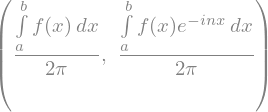

In [32]:
n = var('n', integer=True)
x, a, b = symbols('x, a, b')
f = Function('f')(x)


c_0 = Integral( f , (x, a, b) ) / (2 * π)              # due to bounds; covered when n=0 for c_n–>c_0
c_n = Integral( f * exp(-I*n*x), (x, a, b) ) / (2 * π)

display(( c_0, c_n  ))

***
$\textbf{Example 1}$ Expand in a Fourier series the function
$$f(x) = 
\begin{cases}
0, & -\pi < x < 0\\
1, & 0 < x < \pi
\end{cases}
$$
***

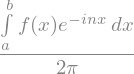

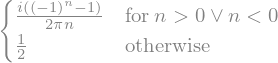

In [33]:
display( c_n )

display( c_n.subs( [(f, 1), (a, 0), (b, π)] ).doit().simplify() )

***

### $\textbf{Fourier Function Representation of Different Interval}$  <a id="FourierDiff_interval"></a>

Consider intervals of length $2\ell$, say ($-\ell, \ell$) or ($0, 2\ell$)

\begin{align}
f(x) &= \frac{a_0}{2} + \sum_{n=0}^{\infty}\left(a_n\cos\left(\frac{n\pi x}{\ell}\right) + b_n\sin\left(\frac{n\pi x}{\ell}\right)\right) \\
f(x) &=\sum_{n=-\infty}^{+\infty} c_n e^{in\pi x/\ell}\\
\end{align}

<br>

*** 
$\textbf{Fourier Coefficients Different Interval}$

\begin{align}
a_n =& \frac{1}{\ell}\int_{-\ell}^{\ell}f(x)\cos\left(\frac{n\pi x}{\ell}\right)dx  \\  
\\
b_n =& \frac{1}{\ell}\int_{-\ell}^{\ell}f(x)\sin\left(\frac{n\pi x}{\ell}\right)dx\\  
\\
c_n =& \frac{1}{2\ell}\int_{-\ell}^{\ell}f(x)e^{-in\pi x/\ell}dx  \\
\end{align}

For the basic interval $(0, 2\ell)$ we need only change the integration limits to $0$ to $2\ell$. The Dirichlet theorem just needs $\pi$ replaced by $\ell$ in order to apply here.
***

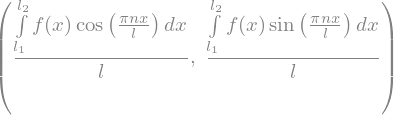

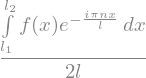

In [34]:
n = var('n', integer=True)
x, l, l1, l2 = symbols('x, l, l_1, l_2')
f = Function('f')(x)
           
a_n = Integral( f * cos( n*pi*x/l ), (x, l1, l2) ) / l
b_n = Integral( f * sin( n*pi*x/l ), (x, l1, l2) ) / l

display(( a_n ,
          b_n  ))


# Or using complex notation
c_n =  Integral( f * exp(-I*n*pi*x/l), (x, l1, l2) ) / (2*l)

display( c_n )

***
$\textbf{Example 2}$
Compute and plot the following functions on the interval (-1, 1) and expand it in an appropriate Fourier series.
$$\begin{cases}
x+x^2, & -1<x<0\\
x-x^2, & 0<x<1
\end{cases}$$
***

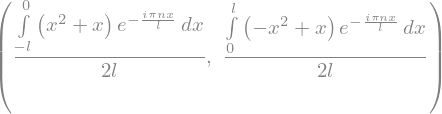

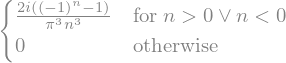

In [35]:
c_nL = Integral( f * exp(-I*n*pi*x/l), (x, -l, 0) ).subs( f, x + x**2 ) / (2*l)
c_nR = Integral( f * exp(-I*n*pi*x/l), (x,  0, l) ).subs( f, x - x**2 ) / (2*l)

display(( c_nL, c_nR ))

(c_nL + c_nR).subs( l , 1 ).doit().simplify()

In [36]:
l = 1

n = np.arange(1, 100, 2)   # where n is odd
x = np.arange(-l, l, 0.001)

y = np.zeros( (len(x), len(n)) )
f = np.zeros( len(x) )

# composes each function decomposed for various values of x
for i in range( len(n) ):
             
    for j in range( len(x) ):
        
        y[j, i] = 8 / np.pi ** 3 * ( np.sin(n[i] * np.pi * x[j]) / n[i] ** 3 )
        
# sums the functions creating the Fourier Series
for i in range( len(x) ):
    
    f[i] = np.sum( y[i, :] )

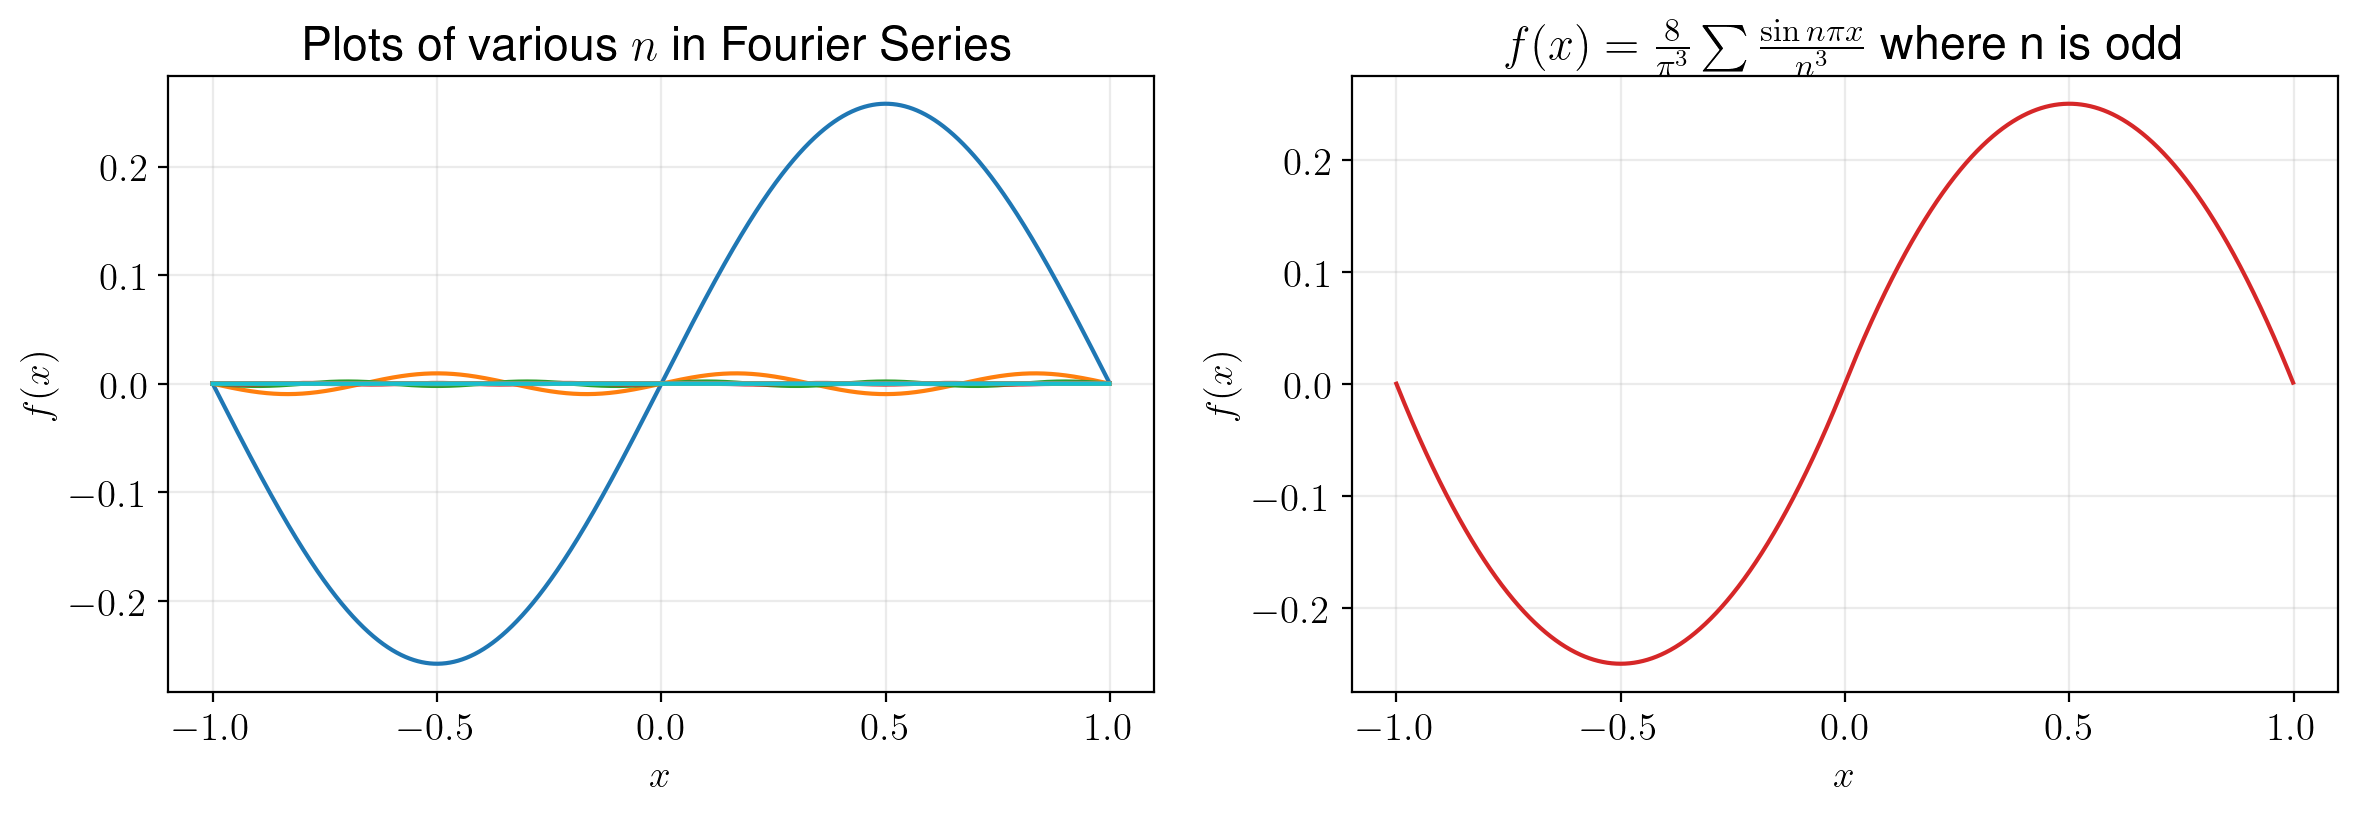

In [37]:
fig, ax = pl.subplots(1, 2, figsize=(14,4))

# plotting
ax[0].plot(x, y)
ax[0].set_title(r'Plots of various $n$ in Fourier Series')
ax[0].set_ylabel(r'$f(x)$')
ax[0].set_xlabel(r'$x$')
ax[0].grid( alpha=0.25 )

FS_Title = r'$\frac{8}{\pi^3}\sum \frac{\sin n\pi x}{n^3}$ where n is odd'
ax[1].plot(x, f, "C3")
ax[1].set_title(rf'$f(x) =$ {FS_Title}')
ax[1].set_ylabel(r'$f(x)$')
ax[1].set_xlabel(r'$x$')
ax[1].grid( alpha=0.25 )
pl.show()

***
$\textbf{Example 3}$
$$
\begin{cases}
f(t) = F_0 \left( - 1 + \frac{4t}{T} )\right), & 0 \le t \le \frac{T}{2} \\
f(t) = F_0 \left( 3 - \frac{4t}{T} )\right), &  \frac{T}{2} \le t \le  T
\end{cases}
$$
***

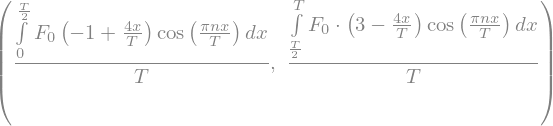

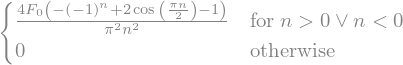

In [38]:
T, F, x = symbols(r'T, F_0, x')
f = Function('f')(x)
n = var('n', integer=True) # if want nonzero n (nonzero=True)

a_nL = Integral( (F * ( - 1 + 4 * x / T)) * cos( n*pi*x/T ), (x, 0, T/2)) / T
a_nR = Integral( (F * ( 3 - 4 * x / T)) * cos( n*pi*x/T ), (x, T/2, T)) / T

Fa = a_nL + a_nR
display(( a_nL,
          a_nR ))

Fa.doit().simplify()

In [39]:
T = 1
F_0 = 1

n = np.arange(1, 100, 2) # odd n
x = np.arange(0, 4*T, 0.01)

y = np.zeros( (len(x), len(n)) )
f = np.zeros( len(x) )

# composes each function decomposed for various values of x
for i in range( len(n) ):
             
    for j in range( len(x) ):
        
        y[j, i] = - 8 * F_0 / (pi * n[i]) ** 2 *( np.cos(n[i] * np.pi * x[j] / T) )
        
# sums the functions creating the Fourier Series
for i in range( len(x) ):
    
    f[i] = np.sum(y[i, :])

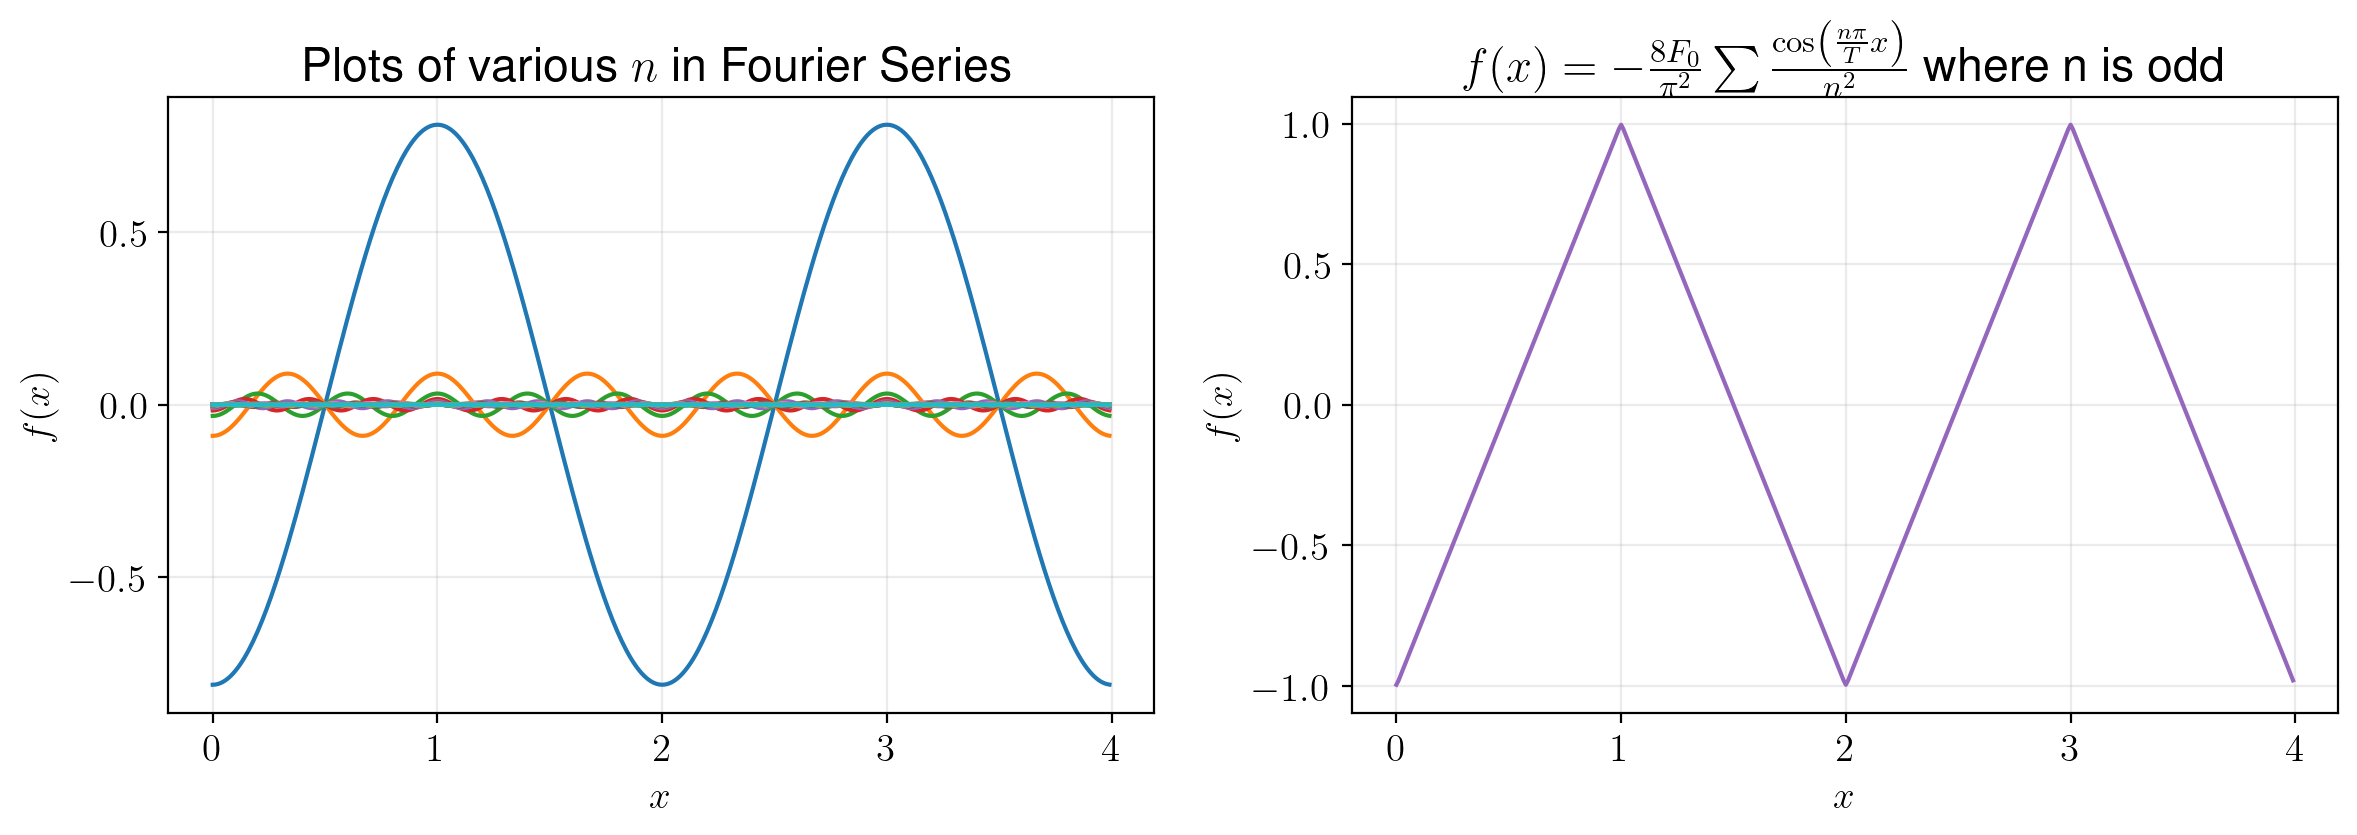

In [40]:
fig, ax = pl.subplots(1, 2, figsize=(14,4))

# plotting
ax[0].plot(x, y)
ax[0].set_title(r'Plots of various $n$ in Fourier Series')
ax[0].set_ylabel(r'$f(x)$')
ax[0].set_xlabel(r'$x$')
ax[0].grid( alpha=0.25 )

FS_Title = r'$- \frac{8F_0}{\pi^2}\sum \frac{\cos\left(\frac{n\pi}{T}x\right)}{n^2}$ where n is odd'
ax[1].plot(x, f, "C4")
ax[1].set_title(rf'$f(x) =$ {FS_Title}')
ax[1].set_ylabel(r'$f(x)$')
ax[1].set_xlabel(r'$x$')
ax[1].grid( alpha=0.25 )
pl.show()

***
$\textbf{Example 4}$
If a violin string is plucked, it is possible to find a formula $f(x,t)$ for the displacement at time $t$ of any point $x$ of the vibrating string. So solve this problem we need to expand the function $f(x,0)$, whose graph is the initial shape of the string, in a Fourier sine series. Find this series if a string of length $\ell$ is pulled aside a small distance $h$ at its center, as shown.

$$ f(x,t=0) = 
\begin{cases}
\frac{2h}{\ell}x & 0<x<\frac{\ell}{2}\\
2h\left(1-\frac{x}{\ell}\right) & \frac{\ell}{2}<x<\ell
\end{cases}
$$
***

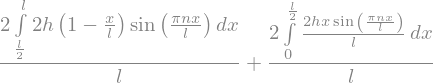

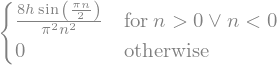

In [41]:
from sympy import *
n = var('n', integer=True) # if want nonzero n (nonzero=True)
h, l, x = symbols('h, l, x')
f = Function('f')(x)

b_nL = 2 / (l) * Integral( f * sin( n*pi*x/l ), (x, 0, l/2) ).subs( f , 2*h*x/l )
b_nR = 2 / (l) * Integral( f * sin( n*pi*x/l ), (x, l/2, l) ).subs( f , 2*h*(1 - x/l) )

FC = b_nL + b_nR
display( FC )

FC.doit().simplify()

In [42]:
h = 5
l = 2

n = np.arange(1, 500, 1)
x = np.arange(0 , 2 * l, 0.01)

y = np.zeros( (len(x), len(n)) )
f = np.zeros( len(x) )

# composes each function decomposed for various values of x
for i in range( len(n) ):
             
    for j in range( len(x) ):
        y[j, i] = 8 * h / np.pi ** 2 * (np.sin(n[i] * np.pi / 2) / n[i]**2 ) * np.sin( n[i] * np.pi * x[j] / l)
        
# sums the functions creating the Fourier Series
for i in range( len(x) ):
    
    f[i] = np.sum( y[i, :] )

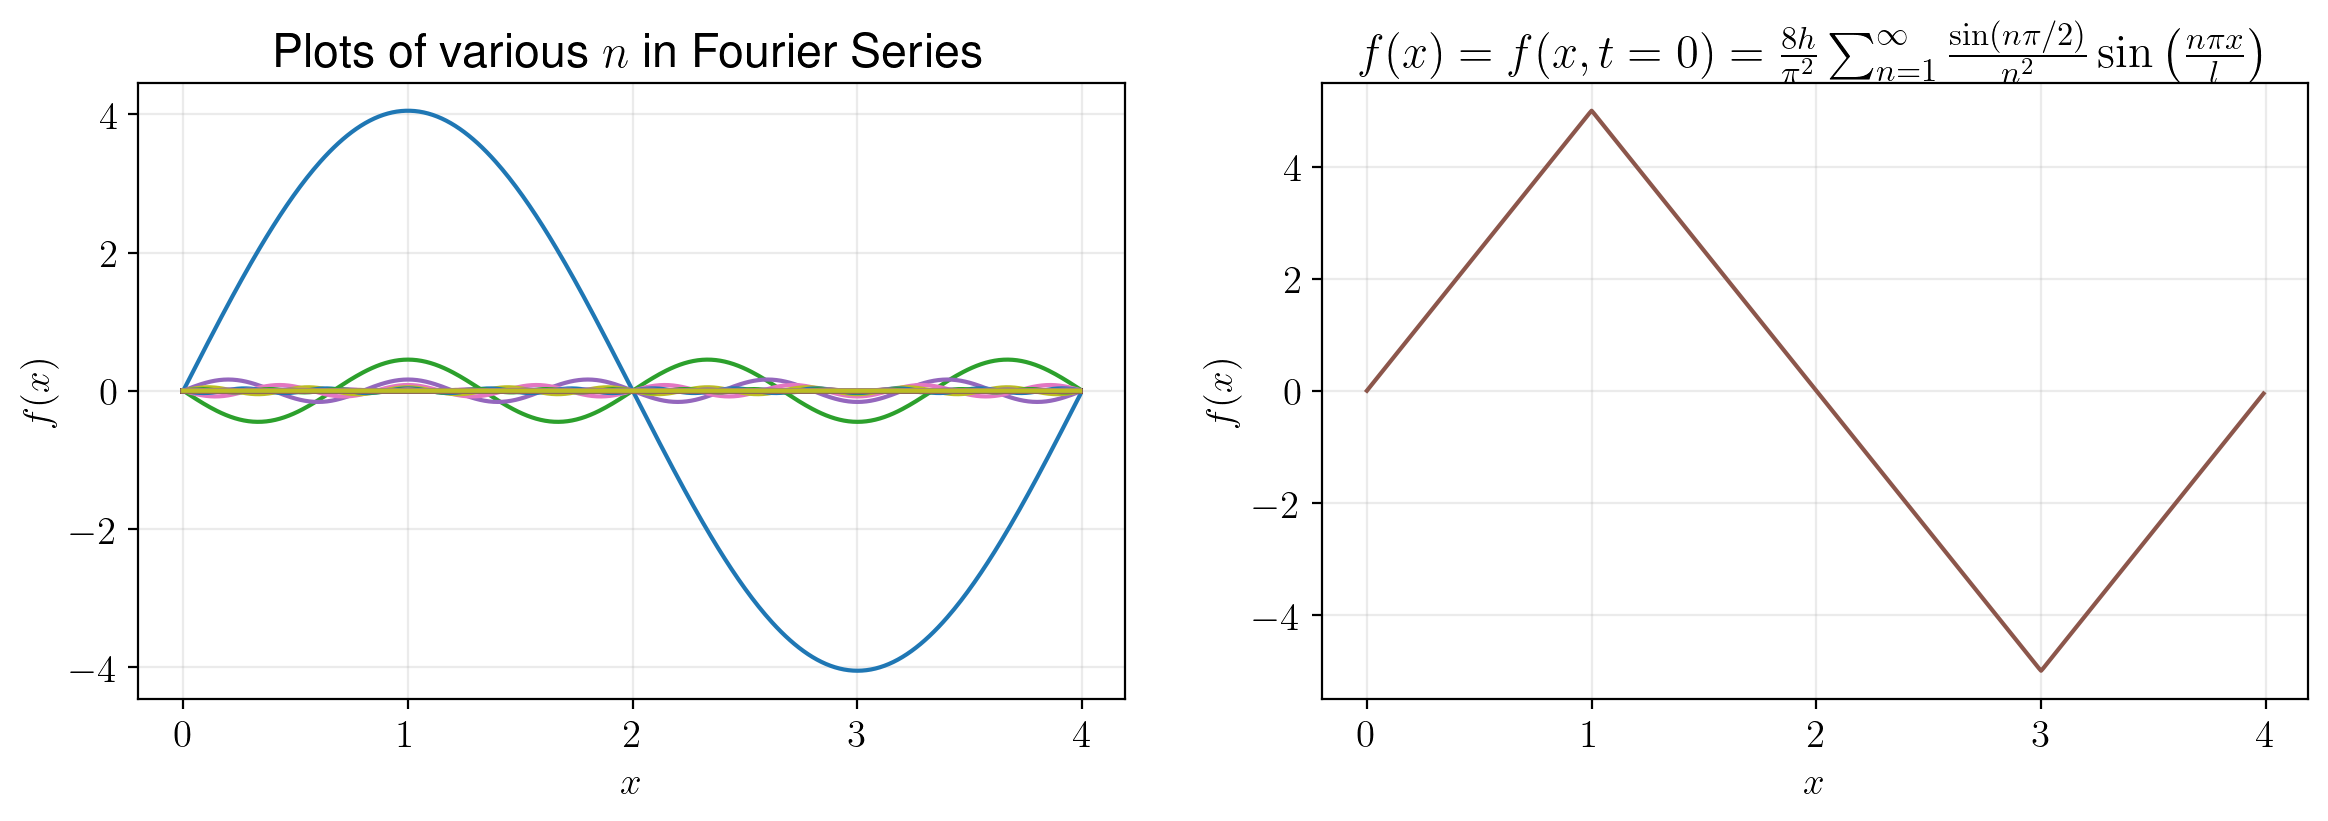

In [44]:
fig, ax = pl.subplots(1, 2, figsize=(14,4))

# plotting
ax[0].plot(x, y)
ax[0].set_title(r'Plots of various $n$ in Fourier Series')
ax[0].set_ylabel(r'$f(x)$')
ax[0].set_xlabel(r'$x$')
ax[0].grid( alpha=0.25 )

FS_Title = r'$f(x,t=0)=\frac{8h}{\pi^2}\sum_{n=1}^\infty\frac{\sin\left(n\pi/2\right)}{n^2}\sin\left(\frac{n\pi x}{l}\right)$'
ax[1].plot(x, f, "C5")
ax[1].set_title(rf'$f(x) =$ {FS_Title}')
ax[1].set_ylabel(r'$f(x)$')
ax[1].set_xlabel(r'$x$')
ax[1].grid( alpha=0.25 )
pl.show()

***
$\textbf{Example 5}$ Find the harmonic content of a signal; what frequencies it contains and in what proportions. Expand each function in a Fourier series. Assume in each case that the part of the graph shown is repeated sixty times per second.

$f(t) = \begin{cases}
1200t & 0<x<\frac{1}{120}\\
0 & \frac{1}{120} <x<\frac{1}{60}
\end{cases}$
***

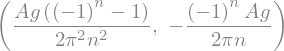

In [45]:
t, A, g = symbols('t, A, g')
n = var('n', integer=True, nonzero=True) # if want nonzero n (nonzero=True)
f = Function('f')(t)

a_n = 2 / (g) * Integral( f * cos( 2*n*pi*t/g ), (t, 0, g/2) ).subs( f, A*t )  # covered when n=0 for a_n –> (a_0)
b_n = 2 / (g) * Integral( f * sin( 2*n*pi*t/g ), (t, 0, g/2) ).subs( f, A*t )

a_n.doit().simplify(), b_n.doit()

In [46]:
g = 1/60
n_o = np.arange(1, 1000, 2)
n = np.arange(1, 501, 1)
x = np.arange(- g / 10 , 2 * g , 0.0001)

y = np.zeros( (len(x), len(n)) )
f = np.zeros( len(x) )

# composes each function decomposed for various values of x
for i in range( len(n) ):
             
    for j in range( len(x) ):
        
        c_in = 120 * n_o[i] * np.pi * x[j]
        s_in = 120 * n[i] * np.pi * x[j]
        y[j, i] = -20*np.cos(c_in)/(n_o[i]*np.pi)**2 - 10*(-1)**n[i]*np.sin(s_in)/(np.pi*n[i])
        
# sums the functions creating the Fourier Series
for i in range( len(x) ):
    
    f[i] = 5 / 2 + np.sum( y[i, :] )
    

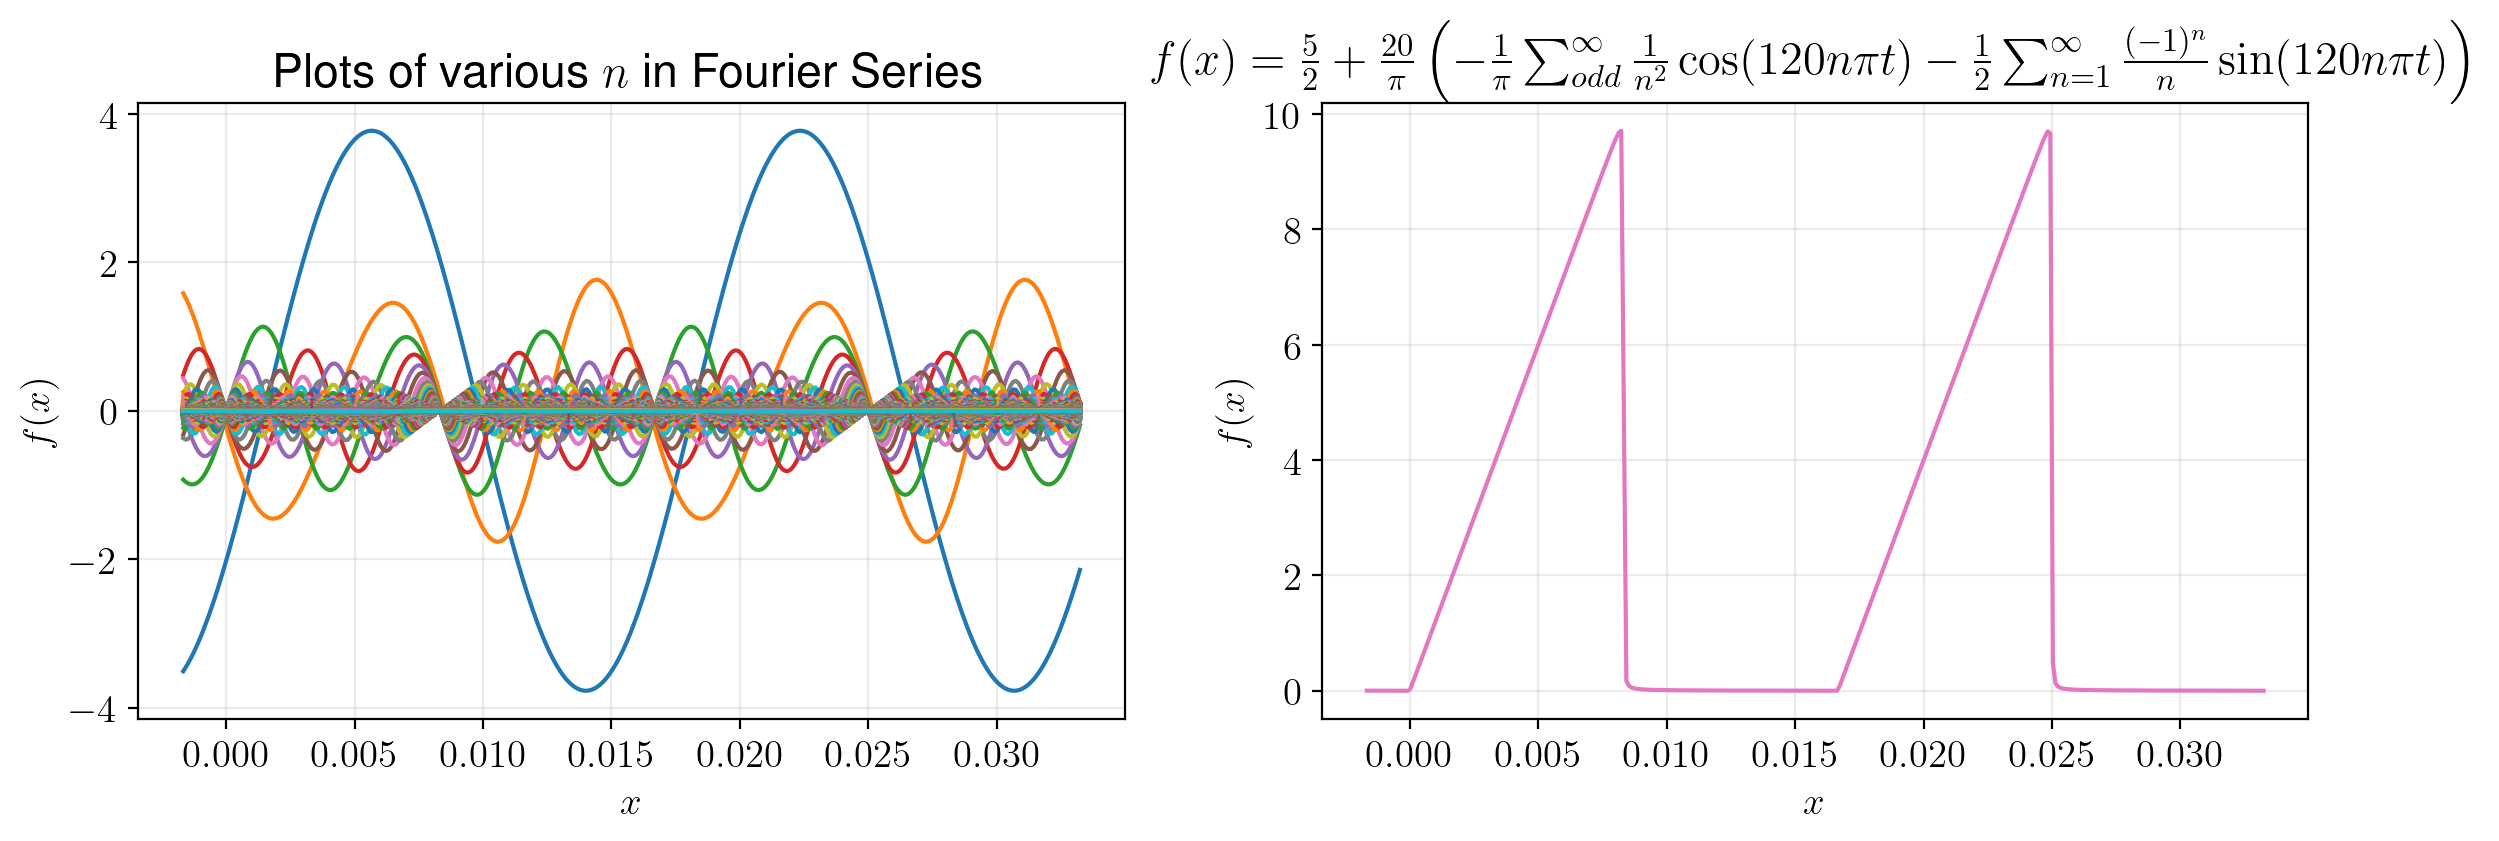

In [47]:
fig, ax = pl.subplots(1, 2, figsize=(14,4))

# plotting
ax[0].plot(x, y)
ax[0].set_title(r'Plots of various $n$ in Fourier Series')
ax[0].set_ylabel(r'$f(x)$')
ax[0].set_xlabel(r'$x$')
ax[0].grid( alpha=0.25 )

FS_Title = r'$\frac{5}{2}+\frac{20}{\pi}\left(-\frac{1}{\pi}\sum_{odd}^{\infty} \frac{1}{n^2}\cos(120n\pi t) - \frac{1}{2}\sum_{n=1}^{\infty}\frac{(-1)^n}{n}\sin(120n\pi t)\right)$'
ax[1].plot(x, f, "C6")
ax[1].set_title(rf'$f(x) =$ {FS_Title}')
ax[1].set_ylabel(r'$f(x)$')
ax[1].set_xlabel(r'$x$')
ax[1].grid( alpha=0.25 )
pl.show()

# Fourier Transforms <a id="FourierTransforms"></a>

***
$\textbf{Definition of Fourier Transforms}$
\begin{align}
\nonumber\\
f(x) & = \int_{-\infty}^\infty g(\alpha) e^{i \alpha x}d\alpha \nonumber  \\ 
\\
g(\alpha) =& \frac{1}{2\pi}\int_{-\infty}^{\infty}f(x)e^{-i\alpha x}dx \nonumber \\
\nonumber
\end{align}

***

$\textbf{Fourier Sine Transforms }$ We define $f_s(x)$ and $g_s(\alpha)$, a pair of $\textsf{Fourier sine transforms representing odd functions}$, by the equations
\begin{align}
\nonumber\\
f_s(x)  = \sqrt{\frac{2}{\pi}}\int_{0}^\infty g_s(\alpha) \sin (\alpha x)d\alpha \nonumber  \\ 
\\
g_s(\alpha) = \sqrt{\frac{2}{\pi}}\int_{0}^\infty f_s(x) \sin (\alpha x)dx \nonumber \\
\nonumber
\end{align}

***

$\textbf{Fourier Cosine Transforms }$ We define $f_c(x)$ and $g_c(x)$, a pair of $\textsf{Fourier cosine transforms representing even functions}$, by the equations
\begin{align}
\nonumber\\
f_c(x)  = \sqrt{\frac{2}{\pi}}\int_{0}^\infty g_c(\alpha) \cos (\alpha x)d\alpha \nonumber  \\ 
\\
g_c(\alpha) = \sqrt{\frac{2}{\pi}}\int_{0}^\infty f_c(x) \cos (\alpha x)dx \nonumber \\
\nonumber
\end{align}
***

***
$\textbf{Problem 9}$, find the exponential Fourier transform of the given $f(x)$ and write $f(x)$ as a Fourier integral [that is, find $g(\alpha)$ in equation (31) and substitute your result into the first integral in equation (31)].

it is clear that our function is 
$f(x) = 
\begin{cases}
2(a + x) & x \in [-a,0]  \\
2(a -x) & x \in [0,a]
\end{cases}
$
***

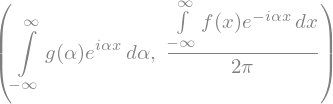

In [48]:
x, al = symbols(r'x, \alpha')
f = Function('f')(x)
g = Function('g')(al)

f_x  = Integral( g * exp( I * al * x) , ( al , - oo , oo ) )
g_al = 1/(2*pi) * Integral( f * exp( - I * al * x) , ( x , - oo , oo ) )

display(( f_x , g_al ))

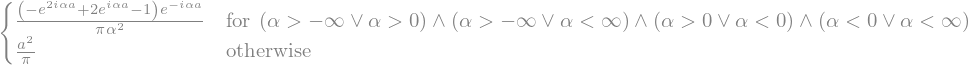

In [49]:
a = Symbol('a')
g_al_ma = 1/(2*pi) * Integral( f * exp( - I * al * x) , ( x , - a , 0 ) ).subs( f , 2*(a+x) )
g_al_pa = 1/(2*pi) * Integral( f * exp( - I * al * x) , ( x , 0 , a ) ).subs( f , 2*(a-x) )

g_func = ((g_al_ma + g_al_pa).doit())
display( g_func.simplify() ) # which simplifies to 2/π (1 - cos(al a))/al^2